In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from get_data import get_data

Text(0, 0.5, '1/min$\\Delta_i$')

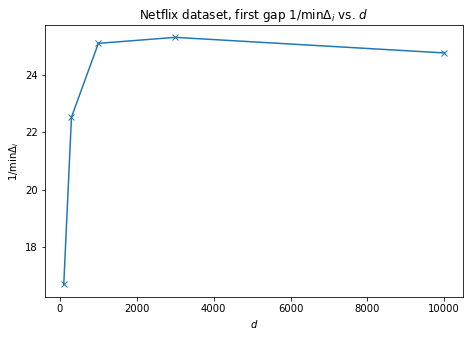

In [ ]:
rng = np.random.default_rng(1)
X = get_data(data_type="NETFLIX", len_signal = 10**4)
atoms = X[0]
signals = X[1]
ds = [100, 300, 1000, 3000, 10000]
seeds = 100
diffs = np.zeros((len(ds), seeds))
for seed in range(seeds):
    for d_idx,d in enumerate(ds):
        subset_indices = rng.choice(10000, d, replace=False)
        atoms_subset, signals_subset = atoms[:, subset_indices], signals[:, subset_indices]
        inner_prods = atoms_subset @ signals_subset.T
        max_ = inner_prods.max()
        second_max = np.partition(inner_prods.flatten(), -2)[-2]
        diffs[d_idx][seed] = ((max_ - second_max) / d)
f = plt.figure()
f.set_figwidth(7.5)
f.set_figheight(5)
plt.plot(ds, 1/(diffs.mean(axis=1)), marker='x')
# plt.plot(np.log(ds), 1/np.sqrt(np.log(ds))/8, color='green')
# plt.plot(np.log(ds), 1/np.log(ds)/3.5, color='orange')
plt.title("Netflix dataset, first gap 1/min$\Delta_i$ vs. $d$")
plt.xlabel("$d$")
plt.ylabel("1/min$\Delta_i$")

Text(0, 0.5, 'min$\\Delta_i$')

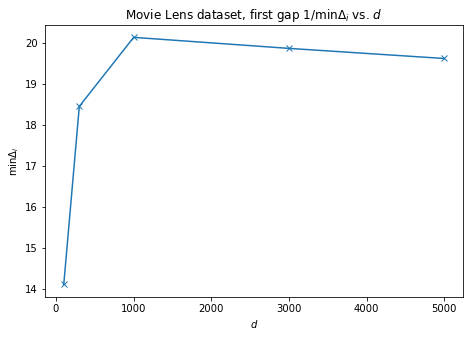

In [34]:
rng = np.random.default_rng(2)
X = get_data(data_type="MOVIE_LENS", len_signal = 5000)
atoms = X[0]
signals = X[1]
ds = [100, 300, 1000, 3000, 5000]
seeds = 10
diffs = np.zeros((len(ds), seeds))
for seed in range(seeds):
    for d_idx,d in enumerate(ds):
        subset_indices = rng.choice(5000, d, replace=False)
        atoms_subset, signals_subset = atoms[:, subset_indices], signals[:, subset_indices]
        inner_prods = atoms_subset @ signals_subset.T
        max_ = inner_prods.max()
        second_max = np.partition(inner_prods.flatten(), -2)[-2]
        diffs[d_idx][seed] = ((max_ - second_max) / d)

f = plt.figure()
f.set_figwidth(7.5)
f.set_figheight(5)

plt.plot(ds, 1/diffs.mean(axis=1), marker='x')
# plt.plot(np.log(ds), 1/np.sqrt(np.log(ds))/7, color='green')
# plt.plot(np.log(ds), 1/np.log(ds)/3, color='orange')
plt.title("Movie Lens dataset, first gap 1/min$\Delta_i$ vs. $d$")
plt.xlabel("$d$")
plt.ylabel("min$\Delta_i$")

In [43]:
rng = np.random.default_rng(1)
X = get_data(data_type="NETFLIX", len_signal = 10**4)
atoms = X[0]
signals = X[1]
ds = [100, 300, 1000, 3000, 10000]
#ds = [100, 200, 400, 800, 1600, 3200, 5000, 6400, 8500, 10000]
seeds = 100
diffs = np.zeros((len(ds), seeds))
for seed in range(seeds):
    for d_idx,d in enumerate(ds):
        subset_indices = rng.choice(10000, d, replace=False)
        atoms_subset, signals_subset = atoms[:, subset_indices], signals[:, subset_indices]
        inner_prods = atoms_subset @ signals_subset.T
        max_ = inner_prods.max()
        Delta_i = ((max_ - inner_prods)/d)
        hardness = calculate_hardness(Delta_i)
        print(hardness)
        diffs[d_idx][seed] = hardness

f = plt.figure()
f.set_figwidth(7.5)
f.set_figheight(5)

[1108.40185668]
[922.53894278]
[609.33220481]
[1254.70067292]
[1258.11184435]
[422.7190929]
[358.18937162]
[151909.24656656]
[642.52311555]
[1258.11184435]
[509.12204414]
[2430.83588847]
[756.86271167]
[4183.25309836]
[1258.11184435]
[1798.65412588]
[1696.85540698]
[1893.12954251]
[850.14086393]
[1258.11184435]
[241.15939933]
[723.918941]
[9407.83230745]
[980.68552025]
[1258.11184435]
[306.36379865]
[791.52451113]
[1190.72827337]
[1179.43093032]
[1258.11184435]
[330.24147091]
[843.30472313]
[111493.27610795]
[1301.65908087]
[1258.11184435]
[1251.59782475]
[458.71439538]
[717.05304483]
[5219.68462361]
[1258.11184435]
[15149.89335813]
[748.09118595]
[826.23986773]
[551.56545924]
[1258.11184435]
[33652.11376838]
[7274.0964645]
[1111.78720378]
[1044.3590885]
[1258.11184435]
[259.464019]
[579.89508172]
[913.86304529]
[1003.50914432]
[1258.11184435]
[435.88400531]
[335.73275689]
[950.08637711]
[2261.96003841]
[1258.11184435]
[1617.03570775]
[442.77372901]
[1881.17361755]
[71478.38080498]
[12

<Figure size 540x360 with 0 Axes>

In [23]:
Delta_i.shape
Delta_i.min()

0.0

In [27]:
fixed_Delta_i = np.delete(Delta_i, Delta_i.argmin())

Text(0, 0.5, 'sum$\\Delta_i^{-2}$')

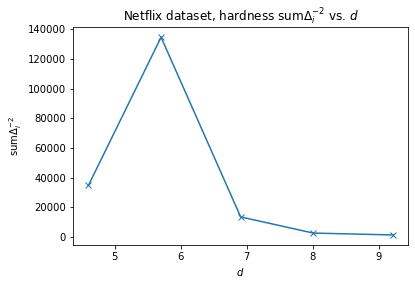

In [44]:
plt.plot(np.log(ds), diffs.mean(axis=1), marker='x')
# plt.plot(np.log(ds), 1/np.sqrt(np.log(ds))/8, color='green')
# plt.plot(np.log(ds), 1/np.log(ds)/3.5, color='orange')
plt.title("Netflix dataset, hardness sum$\Delta_i^{-2}$ vs. $d$")
plt.xlabel("$d$")
plt.ylabel("sum$\Delta_i^{-2}$")

In [42]:
def calculate_hardness(arr_):
    hardness = 0
    for d in arr_:
        if d != 0:
            hardness += (1/(d**2))
    return hardness

In [33]:
diffs

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na